# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [3]:
# Import libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [4]:
# Define a function to load data and aggregate them based on timestamp
def load_and_aggregate_data(file_names):
    """
    Load and aggregate stock data from multiple CSV files based on timestamp.

    Args:
        file_names (list): List of file paths for the stock data CSV files.

    Returns:
        pd.DataFrame: A combined DataFrame with data from all input files, sorted by timestamp.
    """
    data_frames = []
    for file in file_names:
        # Extract stock name from the file name
        stock_name = file.split('_')[0]
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file, parse_dates=['Date'])  # Parse 'Date' column as datetime
        # Add a column for the stock name
        df['Stock'] = stock_name
        # Append the DataFrame to the list
        data_frames.append(df)
    
    # Concatenate all DataFrames into one
    combined_df = pd.concat(data_frames, ignore_index=True)
    # Sort the combined DataFrame by the 'Date' column
    combined_df.sort_values(by='Date', inplace=True)
    combined_df.reset_index(drop=True, inplace=True)
    
    return combined_df


In [5]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
file_names = ['IBM_stocks_data.csv', 'MSFT_stocks_data.csv', 'GOOGL_stocks_data.csv', 'AMZN_stocks_data.csv']
combined_data = load_and_aggregate_data(file_names)
combined_data.head()


,Date,Open,High,Low,Close,Volume,Name,Stock
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM,IBM
1,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,AMZN
2,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT,MSFT
3,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,GOOGL
4,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,AMZN


In [6]:
# View specifics of the data
combined_data.info()
combined_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12077 non-null  datetime64[ns]
 1   Open    12076 non-null  float64       
 2   High    12077 non-null  float64       
 3   Low     12076 non-null  float64       
 4   Close   12077 non-null  float64       
 5   Volume  12077 non-null  int64         
 6   Name    12077 non-null  object        
 7   Stock   12077 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 754.9+ KB


,Date,Open,High,Low,Close,Volume
count,12077,12076.000000,12077.000000,12076.000000,12077.000000,1.207700e+04
mean,2012-01-01 18:44:08.803510784,227.387118,229.422254,225.203189,227.380960,1.671763e+07
min,2006-01-03 00:00:00,15.200000,15.620000,14.870000,15.150000,2.542560e+05
25%,2008-12-31 00:00:00,54.930000,55.660000,54.425000,55.210000,3.124704e+06
50%,2011-12-30 00:00:00,158.795000,160.410000,157.355000,158.880000,5.445269e+06
75%,2015-01-02 00:00:00,281.405000,284.500000,278.610000,281.510000,1.802087e+07
max,2017-12-29 00:00:00,1204.880000,1213.410000,1191.150000,1195.830000,5.910786e+08
std,NaN,236.938260,238.568485,234.981015,236.851101,2.570572e+07


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [7]:
# Handle Missing Values
combined_data.isnull().sum()  # Check for missing values
combined_data.dropna(inplace=True)  # Drop rows with missing values

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

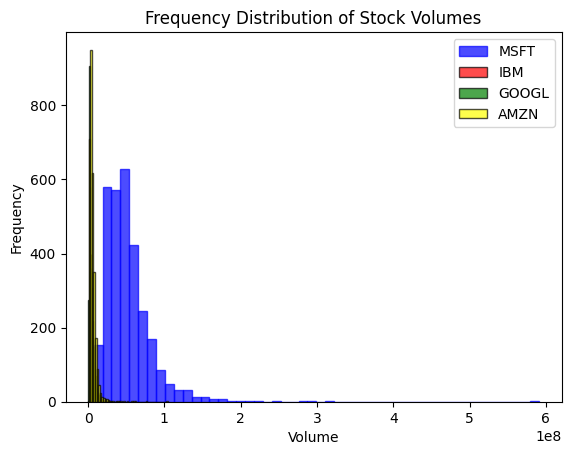

In [8]:
# Frequency distribution of volumes

# Plot MSFT data
msft_data = combined_data[combined_data['Stock'] == 'MSFT']
msft_data['Volume'].plot(kind='hist', bins=50, edgecolor='blue', color='blue', alpha=0.7, label='MSFT')

# Plot IBM data
ibm_data = combined_data[combined_data['Stock'] == 'IBM']
ibm_data['Volume'].plot(kind='hist', bins=50, edgecolor='black', color='red', alpha=0.7, label='IBM')

# Plot GOOGL data
googl_data = combined_data[combined_data['Stock'] == 'GOOGL']
googl_data['Volume'].plot(kind='hist', bins=50, edgecolor='black', color='green', alpha=0.7, label='GOOGL')

# Plot AMZN data
amzn_data = combined_data[combined_data['Stock'] == 'AMZN']
amzn_data['Volume'].plot(kind='hist', bins=50, edgecolor='black', color='yellow', alpha=0.7, label='AMZN')

# Add legend and title for better visibility
plt.legend()
plt.title('Frequency Distribution of Stock Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Show the plot
plt.show()


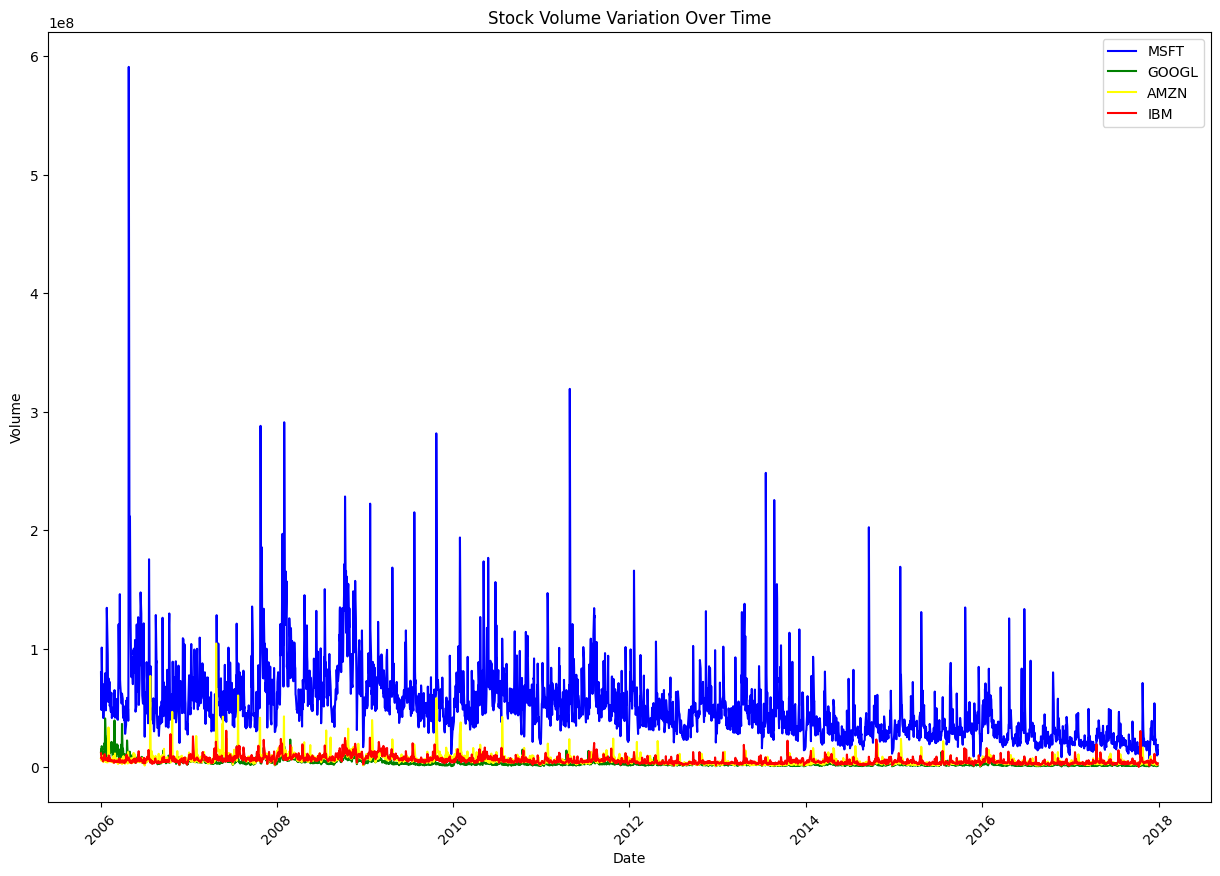

In [9]:
# Stock volume variation over time

plt.figure(figsize=(15, 10))

# Plot MSFT data
plt.plot(msft_data['Date'], msft_data['Volume'], label='MSFT', color='blue')

# Plot GOOGL data
plt.plot(googl_data['Date'], googl_data['Volume'], label='GOOGL', color='green')

# Plot AMZN data
plt.plot(amzn_data['Date'], amzn_data['Volume'], label='AMZN', color='yellow')

# Plot IBM data
plt.plot(ibm_data['Date'], ibm_data['Volume'], label='IBM', color='red')

# Add legend, title, and labels
plt.legend()
plt.title('Stock Volume Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

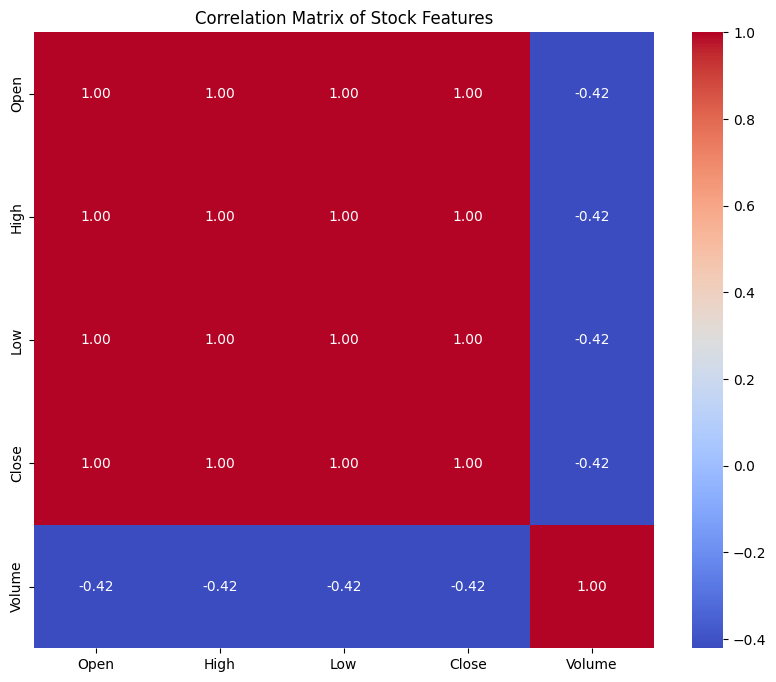

In [10]:
# Analyse correlations
data_without_date_and_name = combined_data.drop(columns=['Date'] + ['Stock'] + ['Name'])

# Compute the correlation matrix
correlation_matrix = data_without_date_and_name.corr()

# Plot the correlation matrix using a heatmap


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Features')
plt.show()


### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [11]:
# Rename the 'Close' column to include the stock name
combined_data['CloseAMZN'] = combined_data.loc[combined_data['Name'] == 'AMZN', 'Close']
combined_data['CloseGOOGL'] = combined_data.loc[combined_data['Name'] == 'GOOGL', 'Close']
combined_data['CloseIBM'] = combined_data.loc[combined_data['Name'] == 'IBM', 'Close']
combined_data['CloseMSFT'] = combined_data.loc[combined_data['Name'] == 'MSFT', 'Close']

# Fill NaN values with 0 to avoid issues during windowing
combined_data.fillna(0, inplace=True)

# Define a function that divides the data into windows and generates target variable values for each window
def create_windowed_data(data, window_size, step_size, target_names):
    X, y = [], []

    for start in range(0, len(data) - window_size, step_size):
        end = start + window_size

        # Create the input window
        window = data.iloc[start:end]
        X.append(window.values)

        # Get the target values for the next time step
        if end < len(data):
            # Instead of directly taking values, get the 'Close' value for the specific stock
            target_values = []
            for target_name in target_names:  # Iterate through target stock names
                # Find the row where 'Name' matches the target stock and get its 'Close' value
                # Get the index of the row where 'Name' matches and 'Date' is the next date
                target_index = data[(data['Name'] == target_name[5:]) & (data['Date'] == data['Date'].iloc[end])].index

                # If the index is found, get the 'Close' value, otherwise append 0
                if len(target_index) > 0:
                    target_value = data.loc[target_index[0], 'Close']  # Get the 'Close' value using the index
                else:
                    target_value = 0  # Or handle the case where the index is not found
                
                target_values.append(target_value)
            y.append(target_values)

    return np.array(X), np.array(y)




#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [12]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

from sklearn.preprocessing import MinMaxScaler

def scale_windowed_data(X):
    scaler = MinMaxScaler()

    # Reshape the training and testing data to fit the scaler
    X_shape = X.shape

    X_flat = X.reshape(-1, X_shape[-1])

    # Use partial_fit on the flattened training data
    scaler.partial_fit(X_flat)

    # Transform the training and testing data
    X_scaled_flat = scaler.transform(X_flat)

    # Reshape the scaled data back to the original shape
    X_scaled = X_scaled_flat.reshape(X_shape)

    return X_scaled


Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [18]:
# Define a function to create input and output data points from the master DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def create_and_split_data(data, target_names, window_size, step_size, split_ratio):

    # 1. Create windowed data
    X, y = create_windowed_data(data, window_size, step_size, target_names)

    # 2. Scale the data
    # Identify numeric columns for scaling
    X_numeric = X[:, :, [1, 2, 3, 4, 5]].astype(float)  

    # Scale the numeric data
    X_scaled = scale_windowed_data(X_numeric)
    y_scaled = scale_windowed_data(y)

    # 3. Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size=split_ratio, shuffle=False)

    return X_train, X_test, y_train, y_test




We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11104\3062862161.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = combined_data.resample('M', on='Date')['Close'].mean()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11104\3062862161.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = combined_data.resample('Q', on='Date')['Close'].mean()


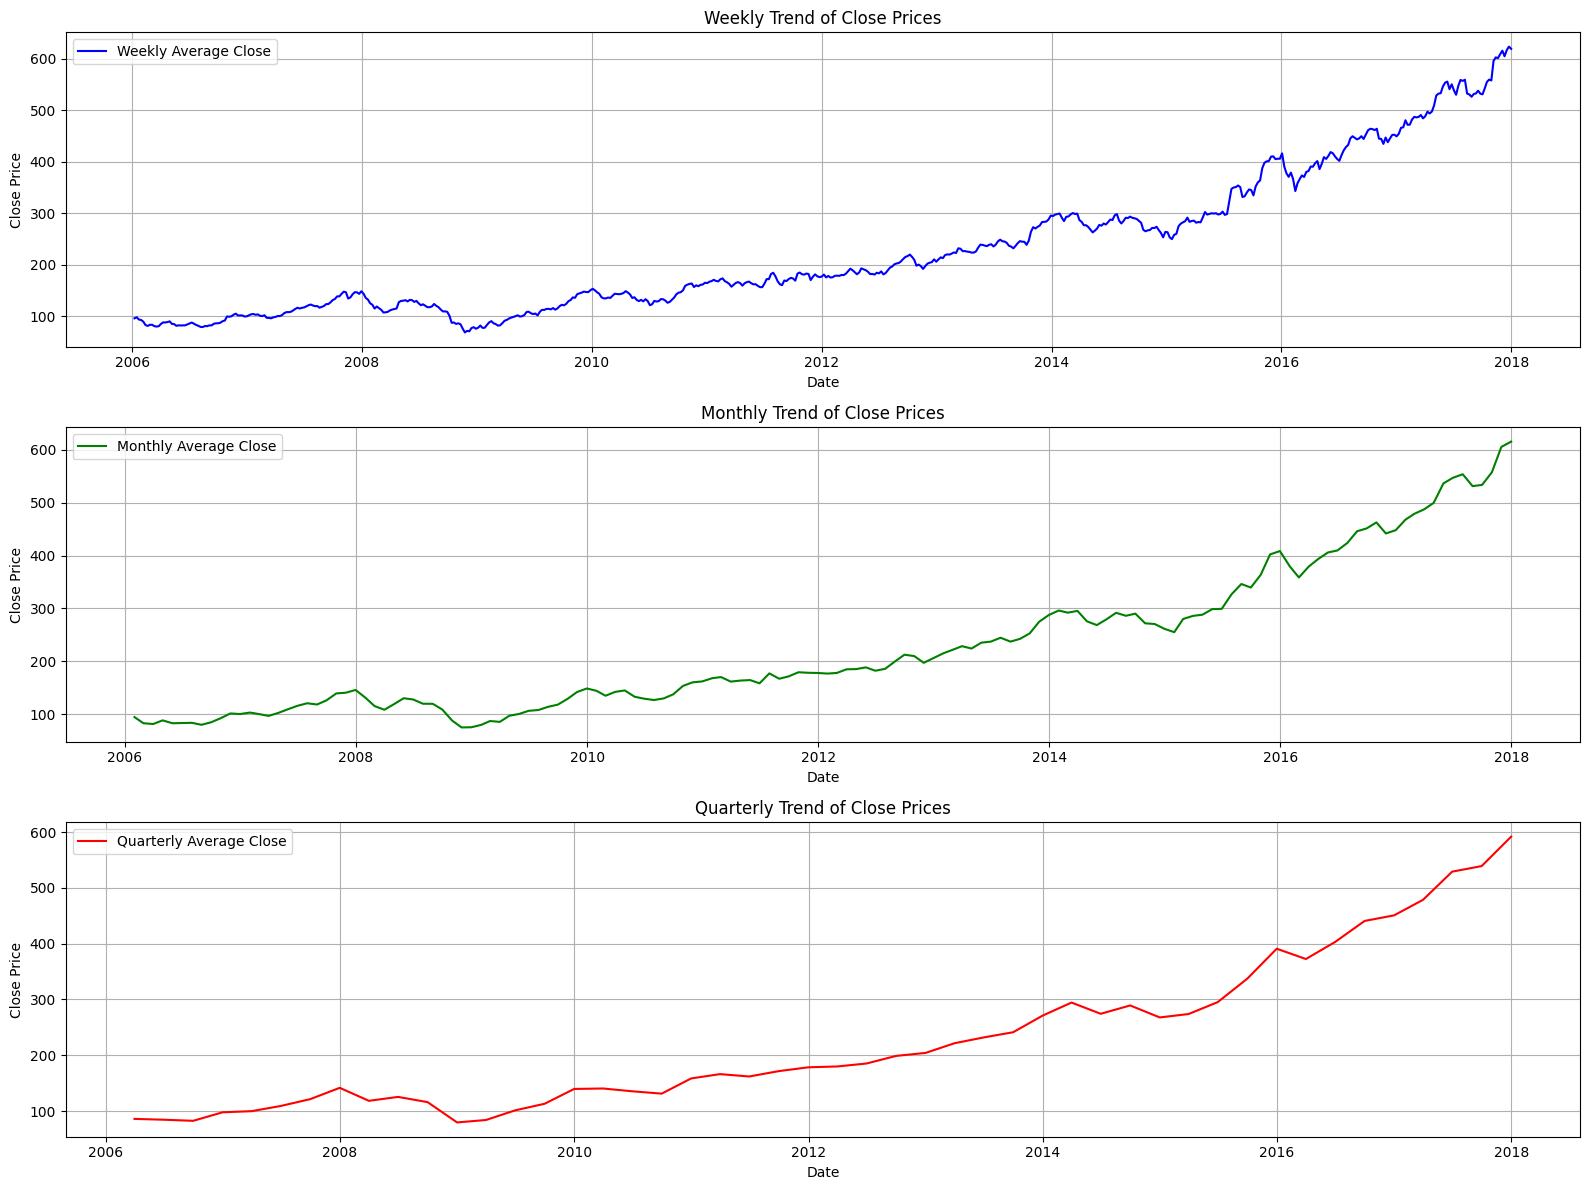

In [20]:
# Resample the data by weeks, months, and quarters
weekly_data = combined_data.resample('W', on='Date')['Close'].mean()
monthly_data = combined_data.resample('M', on='Date')['Close'].mean()
quarterly_data = combined_data.resample('Q', on='Date')['Close'].mean()

# Plot the resampled data
plt.figure(figsize=(16, 12))

# Weekly plot
plt.subplot(3, 1, 1)
plt.plot(weekly_data.index, weekly_data, label='Weekly Average Close', color='blue')
plt.title('Weekly Trend of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Monthly plot
plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, monthly_data, label='Monthly Average Close', color='green')
plt.title('Monthly Trend of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Quarterly plot
plt.subplot(3, 1, 3)
plt.plot(quarterly_data.index, quarterly_data, label='Quarterly Average Close', color='red')
plt.title('Quarterly Trend of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [21]:
# Create data instances from the master data frame using decided window size and window stride
window_size = 80
step_size = 5
split_ratio = 0.8  
target_names = ['CloseAMZN', 'CloseGOOGL', 'CloseIBM', 'CloseMSFT']

X_train, X_test, y_train, y_test = create_and_split_data(combined_data, target_names, window_size, step_size, split_ratio)


In [22]:
# Check the number of data points generated
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1920, 80, 5)
y_train shape: (1920, 4)
X_test shape: (480, 80, 5)
y_test shape: (480, 4)


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [23]:
# Check if the datasets are compatible inputs to neural networks
# Change y_train format to float64
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
# Verify the change
print("y_train dtype:", y_train.dtype)
print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)


y_train dtype: float64
X_train shape: (1920, 80, 5)
X_train dtype: float64
y_train shape: (1920, 4)
y_train dtype: float64


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [24]:
# Create a function that creates a simple RNN model according to the model configuration arguments

# Import necessary libraries for PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [25]:
# Define the RNN model with ReLU activation
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Use the last time step
        return out

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [30]:
# Hyperparameter tuning for Simple RNN
import itertools
from sklearn.metrics import mean_squared_error

# Define hyperparameter grid
hidden_sizes = [20, 50, 100]
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32]

# Store results
results = []

# Define input_size and output_size based on the data
input_size = X_train.shape[2]  # Number of features in the input data
output_size = y_train.shape[1]  # Number of target variables

# Create TensorDataset for training data
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))

# Iterate over all combinations of hyperparameters
for hidden_size, learning_rate, batch_size in itertools.product(hidden_sizes, learning_rates, batch_sizes):
    print(f'Testing configuration: hidden_size={hidden_size}, learning_rate={learning_rate}, batch_size={batch_size}')
    
    # Initialize model, loss function, and optimizer
    model = SimpleRNN(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Create DataLoader with current batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Train the model
    for epoch in range(5):  # Use fewer epochs for tuning
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        # Convert X_test and y_test to PyTorch tensors
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
        
        predictions = model(X_test_tensor)
        test_loss = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    
    # Store the result
    results.append((hidden_size, learning_rate, batch_size, test_loss))
    print(f'Test Loss: {test_loss:.4f}')



Testing configuration: hidden_size=20, learning_rate=0.001, batch_size=16
Test Loss: 0.0241
Testing configuration: hidden_size=20, learning_rate=0.001, batch_size=32
Test Loss: 0.1072
Testing configuration: hidden_size=20, learning_rate=0.0001, batch_size=16
Test Loss: 0.1568
Testing configuration: hidden_size=20, learning_rate=0.0001, batch_size=32
Test Loss: 0.1707
Testing configuration: hidden_size=50, learning_rate=0.001, batch_size=16
Test Loss: 0.0276
Testing configuration: hidden_size=50, learning_rate=0.001, batch_size=32
Test Loss: 0.0427
Testing configuration: hidden_size=50, learning_rate=0.0001, batch_size=16
Test Loss: 0.1365
Testing configuration: hidden_size=50, learning_rate=0.0001, batch_size=32
Test Loss: 0.1578
Testing configuration: hidden_size=100, learning_rate=0.001, batch_size=16
Test Loss: 0.0299
Testing configuration: hidden_size=100, learning_rate=0.001, batch_size=32
Test Loss: 0.0490
Testing configuration: hidden_size=100, learning_rate=0.0001, batch_size=1

In [31]:
# Find the best configuration based on evaluation metrics

best_config = min(results, key=lambda x: x[3])
print(f'Best configuration: hidden_size={best_config[0]}, learning_rate={best_config[1]}, batch_size={best_config[2]}, Test Loss={best_config[3]:.4f}')

Best configuration: hidden_size=20, learning_rate=0.001, batch_size=16, Test Loss=0.0241


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [34]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

# Train and evaluate the optimal Simple RNN model
# Use the best hyperparameters found during tuning
best_hidden_size, best_learning_rate, best_batch_size = best_config[0], best_config[1], best_config[2]

# Initialize the model with the best hidden size
optimal_model = SimpleRNN(input_size, best_hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(optimal_model.parameters(), lr=best_learning_rate)

# Create DataLoader with the best batch size
train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)

# Train the optimal model
num_epochs = 50  # Use more epochs for final training
for epoch in range(num_epochs):
    optimal_model.train()
    for X_batch, y_batch in train_loader:
        outputs = optimal_model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the optimal model
optimal_model.eval()
with torch.no_grad():
    predictions = optimal_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Optimal Model Test Loss: {test_loss.item():.4f}')



Epoch [1/50], Loss: 0.0112
Epoch [2/50], Loss: 0.0131
Epoch [3/50], Loss: 0.0153
Epoch [4/50], Loss: 0.0132
Epoch [5/50], Loss: 0.0074
Epoch [6/50], Loss: 0.0038
Epoch [7/50], Loss: 0.0060
Epoch [8/50], Loss: 0.0059
Epoch [9/50], Loss: 0.0043
Epoch [10/50], Loss: 0.0046
Epoch [11/50], Loss: 0.0066
Epoch [12/50], Loss: 0.0039
Epoch [13/50], Loss: 0.0037
Epoch [14/50], Loss: 0.0047
Epoch [15/50], Loss: 0.0028
Epoch [16/50], Loss: 0.0042
Epoch [17/50], Loss: 0.0060
Epoch [18/50], Loss: 0.0044
Epoch [19/50], Loss: 0.0047
Epoch [20/50], Loss: 0.0055
Epoch [21/50], Loss: 0.0061
Epoch [22/50], Loss: 0.0060
Epoch [23/50], Loss: 0.0034
Epoch [24/50], Loss: 0.0051
Epoch [25/50], Loss: 0.0051
Epoch [26/50], Loss: 0.0044
Epoch [27/50], Loss: 0.0030
Epoch [28/50], Loss: 0.0033
Epoch [29/50], Loss: 0.0020
Epoch [30/50], Loss: 0.0028
Epoch [31/50], Loss: 0.0029
Epoch [32/50], Loss: 0.0012
Epoch [33/50], Loss: 0.0035
Epoch [34/50], Loss: 0.0032
Epoch [35/50], Loss: 0.0016
Epoch [36/50], Loss: 0.0016
E

Plotting the actual vs predicted values

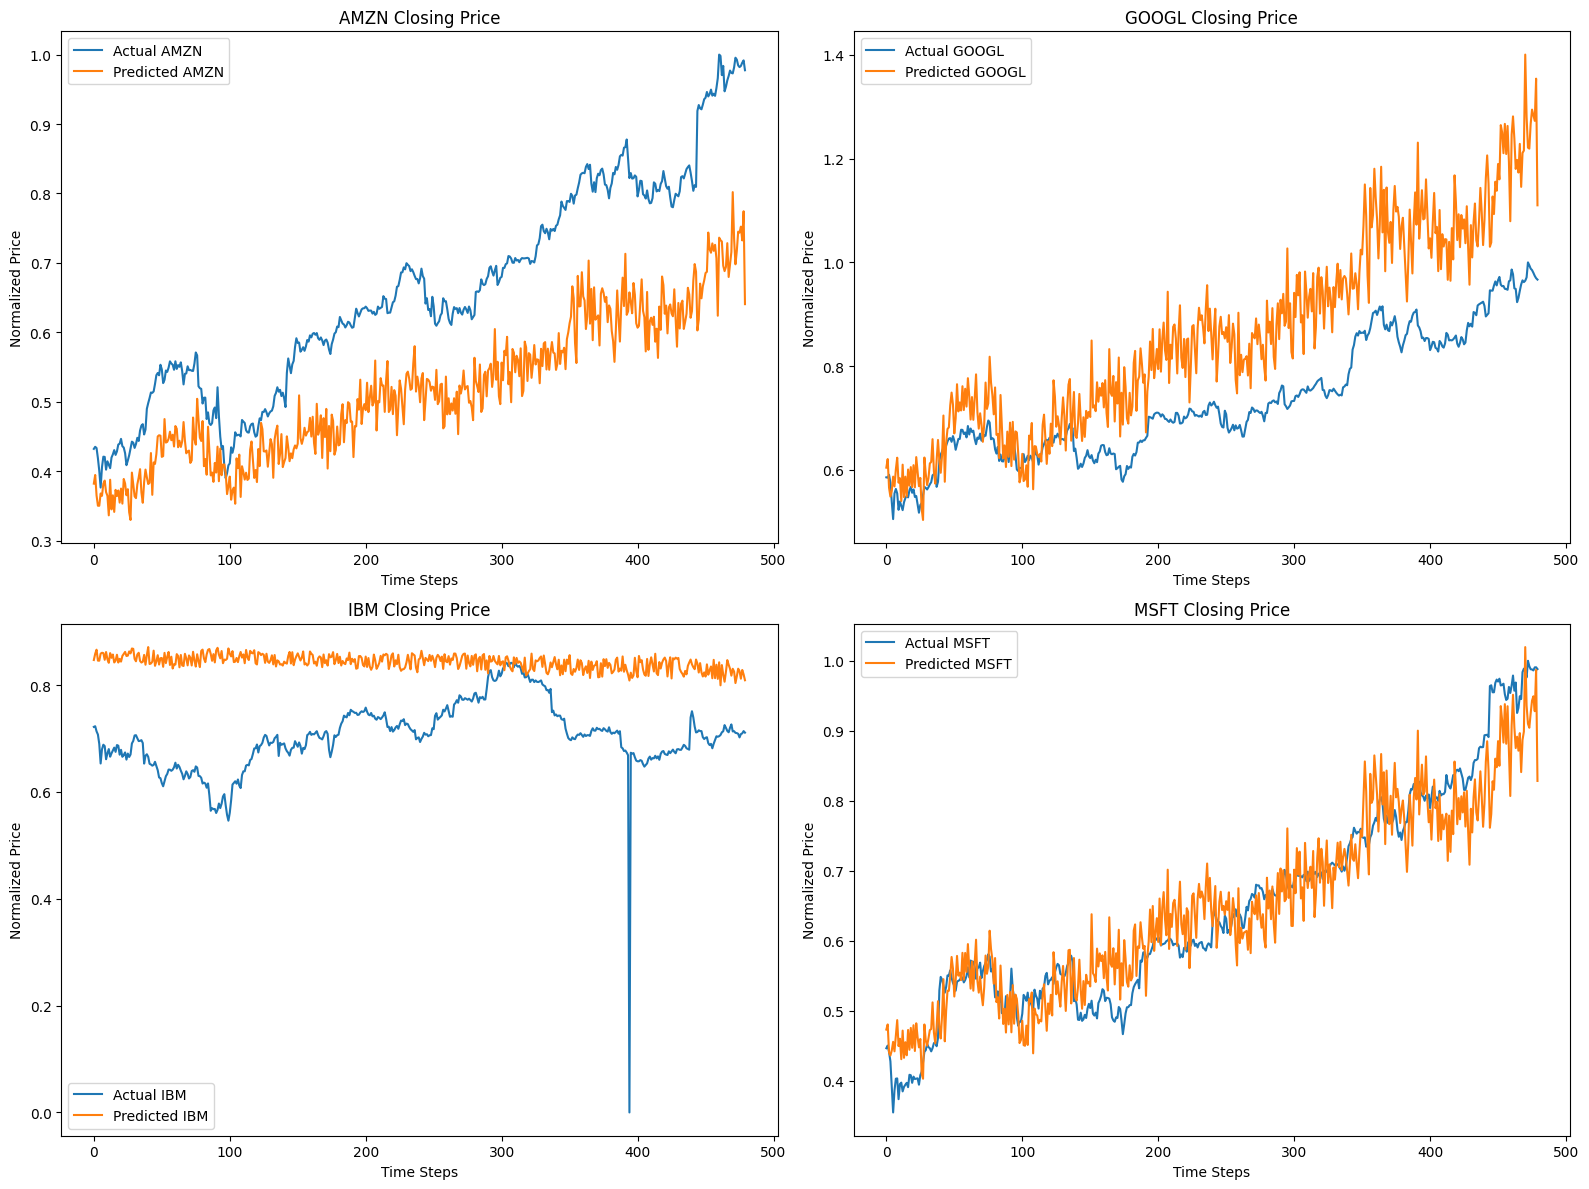

In [ ]:
# Predict on the test data and plot

# Plot actual vs predicted values for each stock
plt.figure(figsize=(16, 12))

# Plot for AMZN
plt.subplot(2, 2, 1)
plt.plot(y_test_np[:, 0], label='Actual AMZN')
plt.plot(predictions_np[:, 0], label='Predicted AMZN')
plt.title('AMZN Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Plot for GOOGL
plt.subplot(2, 2, 2)
plt.plot(y_test_np[:, 1], label='Actual GOOGL')
plt.plot(predictions_np[:, 1], label='Predicted GOOGL')
plt.title('GOOGL Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Plot for IBM
plt.subplot(2, 2, 3)
plt.plot(y_test_np[:, 2], label='Actual IBM')
plt.plot(predictions_np[:, 2], label='Predicted IBM')
plt.title('IBM Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Plot for MSFT
plt.subplot(2, 2, 4)
plt.plot(y_test_np[:, 3], label='Actual MSFT')
plt.plot(predictions_np[:, 3], label='Predicted MSFT')
plt.title('MSFT Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

plt.tight_layout()
plt.show()

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [37]:
# Compute the performance of the model on the testing data set
from sklearn.metrics import mean_squared_error

# Evaluate the model on the testing dataset
y_test_np = y_test_tensor.numpy()  # Convert y_test_tensor to numpy array
predictions_np = predictions.detach().numpy()  # Detach and convert predictions to numpy array

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_np, predictions_np)
print(f"Mean Squared Error (MSE) on the testing dataset: {mse:.4f}")


Mean Squared Error (MSE) on the testing dataset: 0.0185


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [38]:
# # Define a function to create a model and specify default values for hyperparameters
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=50, num_layers=1, output_size=4, dropout=0.0):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.relu(out[:, -1, :])  # Apply ReLU activation
        out = self.fc(out)  # Linear output
        return out


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [40]:
# Find an optimal configuration
# Hyperparameter tuning for LSTM
import itertools
from sklearn.metrics import mean_squared_error

# Define hyperparameter grid
hidden_sizes = [20, 50, 100]
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32]
dropouts = [0.2, 0.5]
num_layers = [1, 2]

# Store results
results = []

# Iterate over all combinations of hyperparameters
for hidden_size, num_layer, learning_rate, batch_size, dropout in itertools.product(hidden_sizes, num_layers, learning_rates, batch_sizes, dropouts):
    print(f'Testing configuration: hidden_size={hidden_size}, num_layers={num_layer}, learning_rate={learning_rate}, batch_size={batch_size}, dropout={dropout}')
    
    # Initialize model, loss function, and optimizer
    model = LSTMModel(input_size=input_size, hidden_size=hidden_size, num_layers=num_layer, output_size=output_size, dropout=dropout)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Create DataLoader with current batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Train the model
    for epoch in range(5):  # Use fewer epochs for tuning
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        test_loss = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    
    # Store the result
    results.append((hidden_size, num_layer, learning_rate, batch_size, dropout, test_loss))
    print(f'Test Loss: {test_loss:.4f}')

# Find the best configuration
best_config = min(results, key=lambda x: x[5])
print(f'Best configuration: hidden_size={best_config[0]}, num_layers={best_config[1]}, learning_rate={best_config[2]}, batch_size={best_config[3]}, dropout={best_config[4]}, Test Loss={best_config[5]:.4f}')


Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.001, batch_size=16, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.0813
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.001, batch_size=16, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.0859
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.001, batch_size=32, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.1085
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.001, batch_size=32, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.0926
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.0001, batch_size=16, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.1821
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.0001, batch_size=16, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.1879
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.0001, batch_size=32, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.2978
Testing configuration: hidden_size=20, num_layers=1, learning_rate=0.0001, batch_size=32, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.2645
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.001, batch_size=16, dropout=0.2
Test Loss: 0.0840
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.001, batch_size=16, dropout=0.5
Test Loss: 0.0806
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.001, batch_size=32, dropout=0.2
Test Loss: 0.1315
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.001, batch_size=32, dropout=0.5
Test Loss: 0.0943
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.0001, batch_size=16, dropout=0.2
Test Loss: 0.1940
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.0001, batch_size=16, dropout=0.5
Test Loss: 0.1873
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.0001, batch_size=32, dropout=0.2
Test Loss: 0.2449
Testing configuration: hidden_size=20, num_layers=2, learning_rate=0.0001, batch_size=32, dropout=0.5
Test Loss: 0.2549
Testing configuration: hid

c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.0798
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.001, batch_size=16, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.0650
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.001, batch_size=32, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.0710
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.001, batch_size=32, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.0701
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.0001, batch_size=16, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.1260
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.0001, batch_size=16, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.1428
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.0001, batch_size=32, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.1248
Testing configuration: hidden_size=50, num_layers=1, learning_rate=0.0001, batch_size=32, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.1575
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.001, batch_size=16, dropout=0.2
Test Loss: 0.0603
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.001, batch_size=16, dropout=0.5
Test Loss: 0.0680
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.001, batch_size=32, dropout=0.2
Test Loss: 0.0771
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.001, batch_size=32, dropout=0.5
Test Loss: 0.0702
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.0001, batch_size=16, dropout=0.2
Test Loss: 0.0909
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.0001, batch_size=16, dropout=0.5
Test Loss: 0.0997
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.0001, batch_size=32, dropout=0.2
Test Loss: 0.1407
Testing configuration: hidden_size=50, num_layers=2, learning_rate=0.0001, batch_size=32, dropout=0.5
Test Loss: 0.1695
Testing configuration: hid

c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.0579
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.001, batch_size=16, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.0525
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.001, batch_size=32, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.0627
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.001, batch_size=32, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.0496
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.0001, batch_size=16, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.0968
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.0001, batch_size=16, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.1017
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.0001, batch_size=32, dropout=0.2


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Test Loss: 0.1244
Testing configuration: hidden_size=100, num_layers=1, learning_rate=0.0001, batch_size=32, dropout=0.5


c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Test Loss: 0.1174
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.001, batch_size=16, dropout=0.2
Test Loss: 0.0601
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.001, batch_size=16, dropout=0.5
Test Loss: 0.0692
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.001, batch_size=32, dropout=0.2
Test Loss: 0.0639
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.001, batch_size=32, dropout=0.5
Test Loss: 0.0568
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.0001, batch_size=16, dropout=0.2
Test Loss: 0.0817
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.0001, batch_size=16, dropout=0.5
Test Loss: 0.0819
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.0001, batch_size=32, dropout=0.2
Test Loss: 0.0776
Testing configuration: hidden_size=100, num_layers=2, learning_rate=0.0001, batch_size=32, dropout=0.5
Test Loss: 0.1047
Best configuration

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [42]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model
# Set hyperparameters for the LSTM model
input_size = X_train.shape[2] 
output_size = y_train.shape[1]
hidden_size, num_layers, learning_rate, batch_size, dropout, test_loss = best_config[0], best_config[1], best_config[2], best_config[3], best_config[4], best_config[5]
num_epochs = 50  # Use more epochs for final training 

# Initialize the LSTM model
lstm_model = LSTMModel(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the LSTM model
for epoch in range(num_epochs):
    lstm_model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')





c:\Users\Hieu Ho\Documents\VSCode Projects\RNN stock\.venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Epoch [1/50], Loss: 0.0123
Epoch [2/50], Loss: 0.0056
Epoch [3/50], Loss: 0.0032
Epoch [4/50], Loss: 0.0022
Epoch [5/50], Loss: 0.0016
Epoch [6/50], Loss: 0.0011
Epoch [7/50], Loss: 0.0014
Epoch [8/50], Loss: 0.0021
Epoch [9/50], Loss: 0.0017
Epoch [10/50], Loss: 0.0019
Epoch [11/50], Loss: 0.0016
Epoch [12/50], Loss: 0.0020
Epoch [13/50], Loss: 0.0016
Epoch [14/50], Loss: 0.0021
Epoch [15/50], Loss: 0.0019
Epoch [16/50], Loss: 0.0012
Epoch [17/50], Loss: 0.0014
Epoch [18/50], Loss: 0.0018
Epoch [19/50], Loss: 0.0018
Epoch [20/50], Loss: 0.0017
Epoch [21/50], Loss: 0.0017
Epoch [22/50], Loss: 0.0018
Epoch [23/50], Loss: 0.0015
Epoch [24/50], Loss: 0.0012
Epoch [25/50], Loss: 0.0018
Epoch [26/50], Loss: 0.0018
Epoch [27/50], Loss: 0.0013
Epoch [28/50], Loss: 0.0023
Epoch [29/50], Loss: 0.0016
Epoch [30/50], Loss: 0.0012
Epoch [31/50], Loss: 0.0012
Epoch [32/50], Loss: 0.0014
Epoch [33/50], Loss: 0.0016
Epoch [34/50], Loss: 0.0011
Epoch [35/50], Loss: 0.0017
Epoch [36/50], Loss: 0.0015
E

In [43]:
# Compute the performance of the model on the testing data set
# Evaluate the LSTM model
lstm_model.eval()
with torch.no_grad():
    predictions = lstm_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'LSTM Model Test Loss: {test_loss.item():.4f}')

LSTM Model Test Loss: 0.0382


Plotting the actual vs predicted values

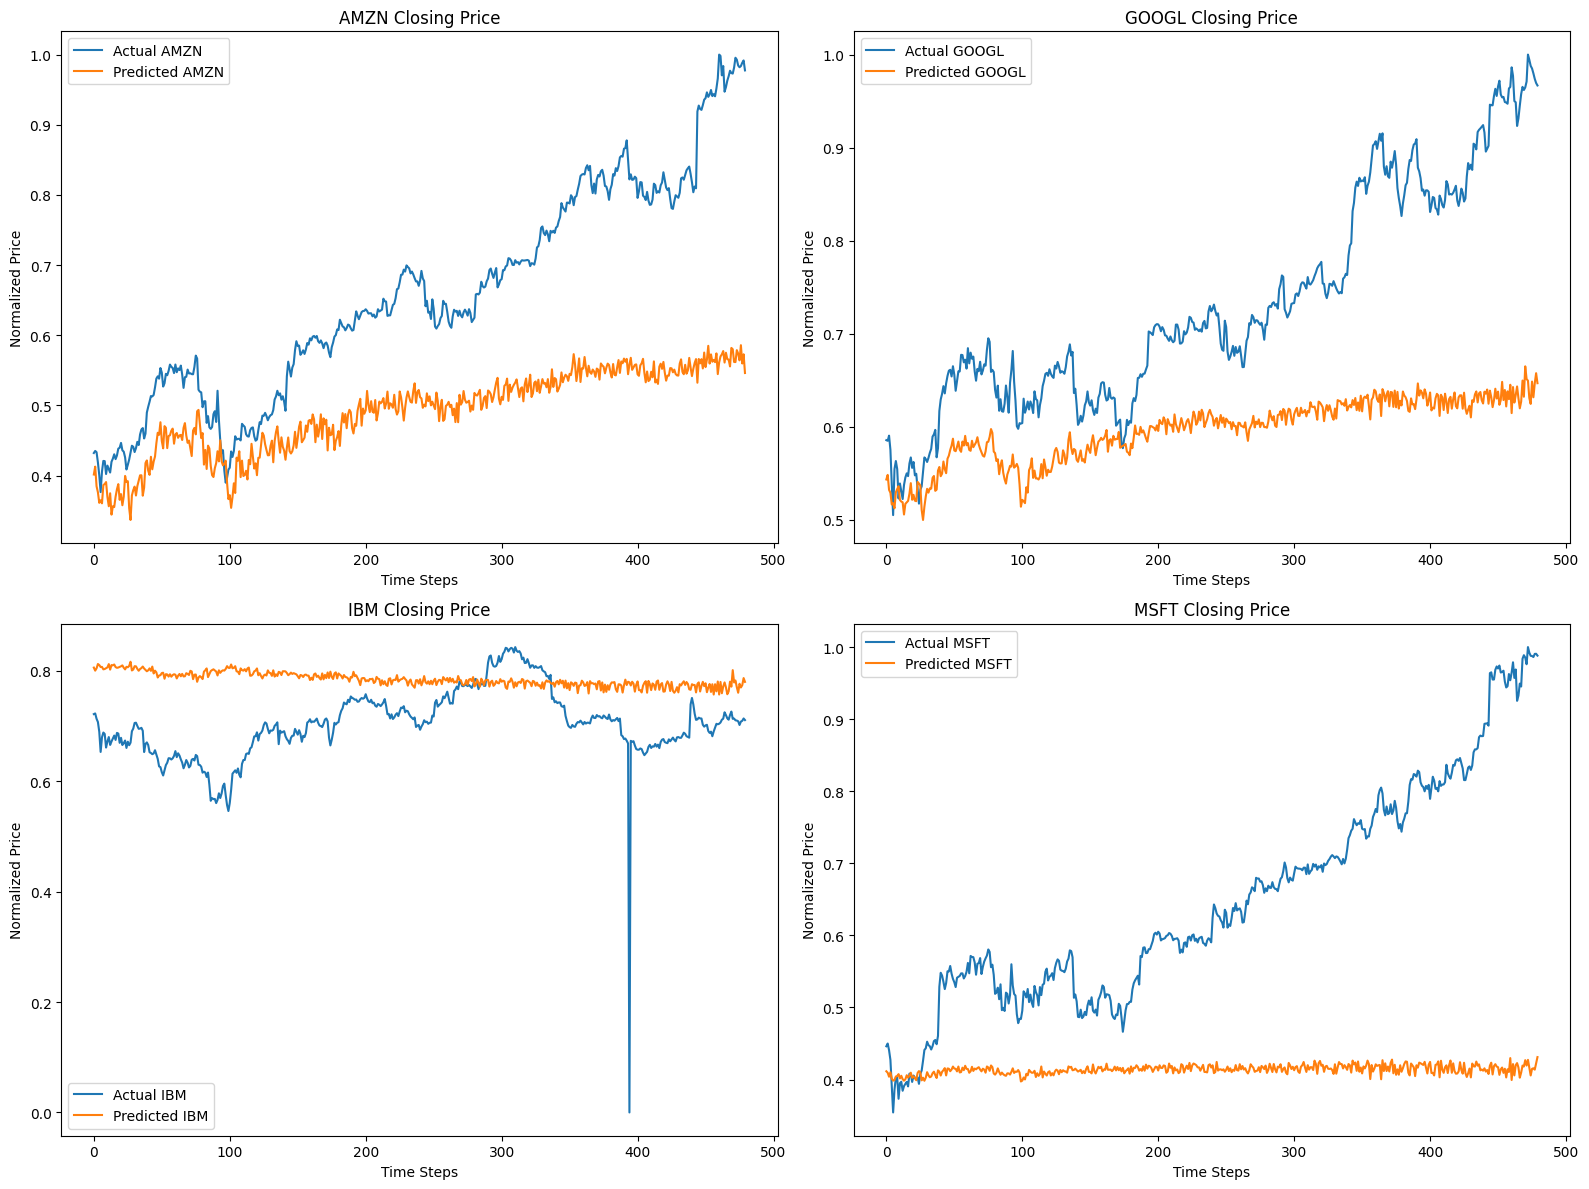

In [44]:
# Predict on the test data
# Plot actual vs predicted values for each stock
plt.figure(figsize=(16, 12))

# Plot for AMZN
plt.subplot(2, 2, 1)
plt.plot(y_test_np[:, 0], label='Actual AMZN')
plt.plot(predictions.numpy()[:, 0], label='Predicted AMZN')
plt.title('AMZN Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Plot for GOOGL
plt.subplot(2, 2, 2)
plt.plot(y_test_np[:, 1], label='Actual GOOGL')
plt.plot(predictions.numpy()[:, 1], label='Predicted GOOGL')
plt.title('GOOGL Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Plot for IBM
plt.subplot(2, 2, 3)
plt.plot(y_test_np[:, 2], label='Actual IBM')
plt.plot(predictions.numpy()[:, 2], label='Predicted IBM')
plt.title('IBM Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

# Plot for MSFT
plt.subplot(2, 2, 4)
plt.plot(y_test_np[:, 3], label='Actual MSFT')
plt.plot(predictions.numpy()[:, 3], label='Predicted MSFT')
plt.title('MSFT Closing Price')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.legend()

plt.tight_layout()
plt.show()


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

Compared with RNN that is hyper-parameter-tunned, the LSTM that is hyper-parameter-tunned does not perform as well.
However, maybe there are limitations coming from time contrainst and computering power that prevent a better prediction from LSTM. These limitations can be solved given more time and resources involved.

By combining data from 4 companies in Technology field, I don't think it helps to predict the result (Close value) for individual company better. I tried to perform both vinalla RNN and LSTM on single data from only on company and the prediction is much better. 

In this assignment, my computer does not allow to install tensorflow due to my out-dated CPU. However, I try implementing Neural network model using pytorch instead and it still works, though it's a bit more complicated. 

In the future, given more time, I can try playing with different values of the window_length and step_stride, which can help to improve the overall RNN performance significantly.

Lastly, although this is a group assignment, I work on this by my self and nobody ever contact me. Falling behind the course schedule due to the technical glitch which lasted for a month, I think I tried my best here.